### Taller Redes Convolucionales para clasificación de imagenes con NMIST

**Diego Alejandro Alzate Rodríguez**

In [1]:
# Importamos librerias que usaremos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [4]:
# Construimos las clases para la creación de infraestructuras, entrenamiento y visualización de rendimiento de 3 redes convolucionales
class CNNModel:
    def __init__(self, input_shape=(28, 28, 1), num_classes=10):
        '''Declaramos los atributos iniciales de los objetos que recibe la clase, es decir las imagenes de 28x28 pixeles y un canal de color.
        '''
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = None
        self.history = None

    def build_simple_model(self):
        '''Permite construir la arquitectura de una red convolucional simple, recibe como input 
        las imagenes NMIST previamente transformadas.'''

        self.model = keras.Sequential([
            keras.Input(shape=self.input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(self.num_classes, activation='softmax')
        ])

    def build_complex_model(self):
        '''Permite construir un modelo de red convolucional más complejo, con más capas densas 
        y el uso de regularización para prevenir sobreentrenamiento. Recibe como input el set de imagenes transformadas de NMIST.'''

        self.model = keras.Sequential([
            keras.Input(shape=self.input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(self.num_classes, activation='softmax')
        ])

    def build_1x1_model(self):
        '''Construye un modelo de redes convolucionales con filtros 1x1 y capas densas extras, así como con capas de regularización'''

        self.model = keras.Sequential([
            keras.Input(shape=self.input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
            layers.Conv2D(32, kernel_size=(1, 1), activation='relu', padding='same'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            layers.Conv2D(64, kernel_size=(1, 1), activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(self.num_classes, activation='softmax')
        ])

    def compile_and_train(self, X_train, y_train, X_test, y_test, epochs=30, batch_size=128, data_augmentation=False):
        '''Construye los datos de entrenamiento y testeo, para redes con 30 épocas, así como el uso de data augmentation 
        para incrementar el conjunto de datos de entrenamiento y reducir el sobreajuste, mejorando la precisión.'''

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        callbacks = [reduce_lr, early_stopping]

        if data_augmentation:
            datagen = ImageDataGenerator(
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                zoom_range=0.1
            )
            datagen.fit(X_train)
            self.history = self.model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, 
                                          validation_data=(X_test, y_test), callbacks=callbacks)
        else:
            self.history = self.model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                          validation_data=(X_test, y_test), callbacks=callbacks)

    def plot_performance(self):
        '''Realiza una gráfica de la precisión y la pérdida del modelo de red neuronal convolucional usando el histórico de entrenamiento y testeo'''
        
        if self.history is None:
            print("El modelo no ha sido entrenado aún.")
            return

        plt.figure(figsize=(12, 4))

        # Precisión
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Precisión Entrenamiento')
        plt.plot(self.history.history['val_accuracy'], label='Precisión Validación')
        plt.xlabel('Época')
        plt.ylabel('Precisión')
        plt.legend()
        plt.title('Precisión del Modelo')

        # Pérdida
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Pérdida Entrenamiento')
        plt.plot(self.history.history['val_loss'], label='Pérdida Validación')
        plt.xlabel('Época')
        plt.ylabel('Pérdida')
        plt.legend()
        plt.title('Pérdida del Modelo')

        plt.show()

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7839 - loss: 0.8640 - val_accuracy: 0.9375 - val_loss: 0.2157 - learning_rate: 0.0010
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9466 - loss: 0.1852 - val_accuracy: 0.9608 - val_loss: 0.1378 - learning_rate: 0.0010
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9673 - loss: 0.1141 - val_accuracy: 0.9687 - val_loss: 0.1078 - learning_rate: 0.0010
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9762 - loss: 0.0878 - val_accuracy: 0.9745 - val_loss: 0.0874 - learning_rate: 0.0010
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9803 - loss: 0.0710 - val_accuracy: 0.9771 - val_loss: 0.0816 - learning_rate: 0.0010
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9828 - loss: 0.0613 - val_accuracy: 0.9748 - val_loss: 0.0818 - learning_rate: 0.0010
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9836 - loss: 0.

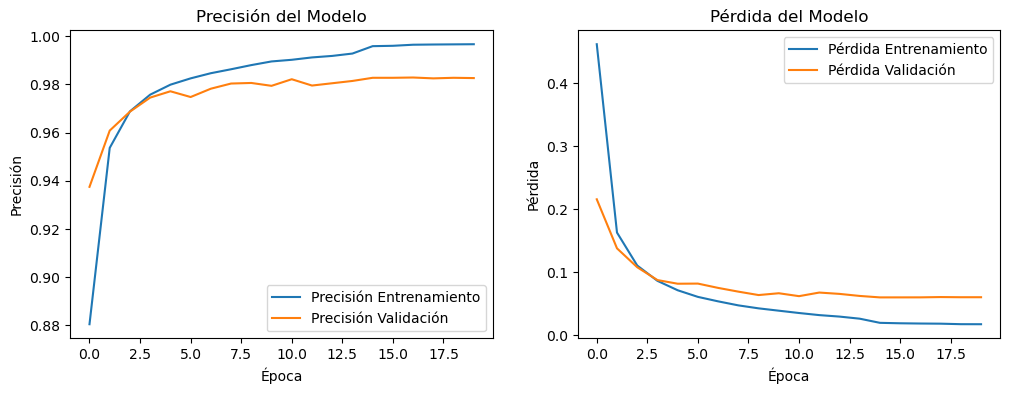

Epoch 1/30


c:\Users\djdie\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 46s 170ms/step - accuracy: 0.5646 - loss: 1.4876 - val_accuracy: 0.4905 - val_loss: 2.9916 - learning_rate: 0.0010
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 168ms/step - accuracy: 0.8587 - loss: 0.4677 - val_accuracy: 0.9457 - val_loss: 0.1808 - learning_rate: 0.0010
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.8979 - loss: 0.3347 - val_accuracy: 0.9699 - val_loss: 0.1026 - learning_rate: 0.0010
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.9122 - loss: 0.2962 - val_accuracy: 0.9779 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 168ms/step - accuracy: 0.9306 - loss: 0.2365 - val_accuracy: 0.9825 - val_loss: 0.0568 - learning_rate: 0.0010
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 46s 173ms/step - accuracy: 0.9393 - loss: 0.2041 - val_accuracy: 0.9855 - val_loss: 0.0473 - learning_rate: 0.0010
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 167ms/step - accuracy: 0.9467 - loss:

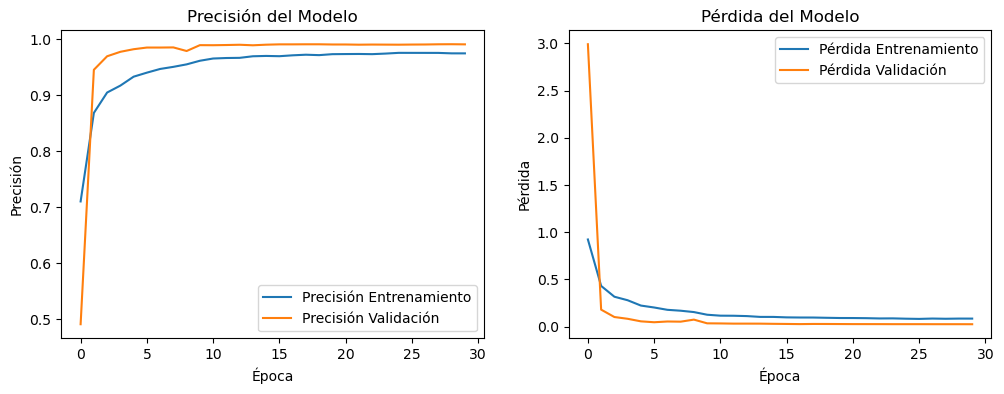

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step - accuracy: 0.6618 - loss: 1.0061 - val_accuracy: 0.9731 - val_loss: 0.0878 - learning_rate: 0.0010
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.9345 - loss: 0.2136 - val_accuracy: 0.9826 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.9532 - loss: 0.1565 - val_accuracy: 0.9838 - val_loss: 0.0498 - learning_rate: 0.0010
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.9624 - loss: 0.1212 - val_accuracy: 0.9865 - val_loss: 0.0465 - learning_rate: 0.0010
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.9667 - loss: 0.1093 - val_accuracy: 0.9889 - val_loss: 0.0349 - learning_rate: 0.0010
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.9697 - loss: 0.0993 - val_accuracy: 0.9861 - val_loss: 0.0433 - learning_rate: 0.0010
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.9

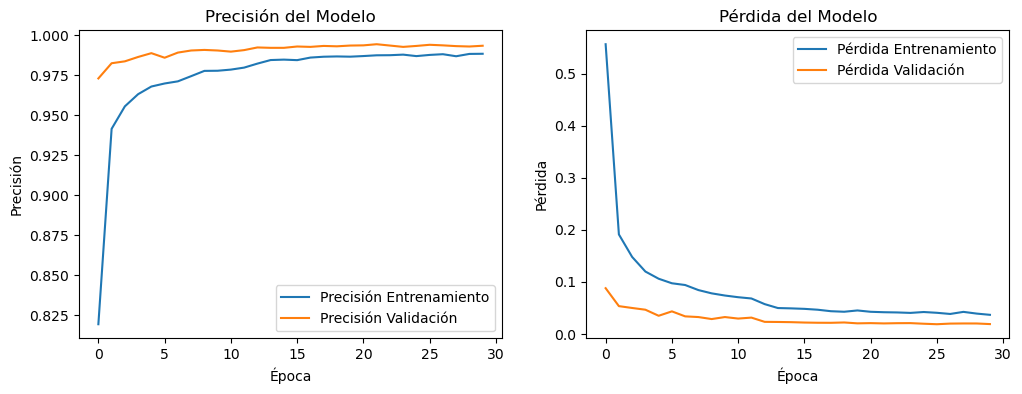

In [5]:
# Carga y preprocesamiento de datos 
file_path = '..\\Redes Neuronales Recurrentes\\data\\NMIST.csv'
df = pd.read_csv(file_path)
labels = df['label'].values
data = df.drop('label', axis=1).values
images = data.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Crear y entrenar los modelos
simple_cnn = CNNModel()
simple_cnn.build_simple_model()
simple_cnn.compile_and_train(X_train, y_train, X_test, y_test)
simple_cnn.plot_performance()

complex_cnn = CNNModel()
complex_cnn.build_complex_model()
complex_cnn.compile_and_train(X_train, y_train, X_test, y_test, data_augmentation=True) #con aumento de datos
complex_cnn.plot_performance()

model_1x1_cnn = CNNModel()
model_1x1_cnn.build_1x1_model()
model_1x1_cnn.compile_and_train(X_train, y_train, X_test, y_test, data_augmentation=True) #con aumento de datos
model_1x1_cnn.plot_performance()

### Interpretación de Resultados

**Modelo Simple:**

- La diferencia entre la precisión de entrenamiento y la precisión de validación es crucial. En este caso, vemos una brecha entre ambas. La precisión de entrenamiento es significativamente mayor que la de validación. Esto es un signo de sobreajuste (overfitting). El modelo está aprendiendo tan bien los datos de entrenamiento que le cuesta generalizar a datos nuevos (los datos de validación). En otras palabras, el modelo se está "memorizando" los datos de entrenamiento en lugar de aprender patrones generales.

- El modelo aprende rápidamente a clasificar las imágenes de entrenamiento viendo la linea azul crece a través de las épocas de forma acelerada para estabilizarse casi al 100%, para la linea naranja, vemos la precisión en el conjunto de prueba a lo largo de las épocas, vemos un aumento inicial estabilizandose en un valor menor al de entrenamiento, cerca del 98%.

- Para la gráfica de pérdida, refuerza la conclusión de sobreajuste. A medida que la pérdida en entrenamiento sigue disminuyendo a lo largo de las épocas, la périda de validación deja de hacerlo e incluso podría subir, reflejando esto que el modelo está empezando a tener un mal comportamiento para observaciones nuevas.

**Modelo Complejo:**

- El modelo aprende muy bien de los datos de entrenamiento, al tener un crecimiento rápido en la linea azul de la precisión alcanzando valores cercanos a 1 y manteniendose estable. Para la linea naranja representando la precisión en el conjunto de prueba, muestra un crecimiento acelerado en las primeras épocas para estabilizarse en un valor cercano al 99%. Esto implica que la brecha entre la precisión en entrenamiento y testeo es menor a la del modelo simple.

- En conclusión el sobreajuste se ha reducido considerablemente, lo que implica que el modelo permite generalizar el proceso generador de datos para nuevas observaciones y por ende predecir de forma más robusta.

- La linea azul en la función de pérdida para datos de entrenamiento, disminuye constante y suave a lo largo de las épocas, siendo un comportamiento deseable. La linea naranja en la función de pérdida representando los datos de testeo disminuye rápidamente al inicio estabilizandose en un valor bajo muy cercano a cero a lo largo de las épocas, mostrando que la pérdida en testeo sigue el mismo comportamiento que la función de pérdida en entrenamiento y no muestra una estabilización prematura.

**Modelo con filtros 1x1:**

-  La diferencia entre la precisión de entrenamiento y validación es pequeña, lo que nos sugiere que el modelo generaliza bastante bien. Sin embargo algunas fluctuaciones en la precisión en validación podrian indicar cierta inestabilidad en el entrenamiento o la necesidad de un ajuste más fino.

- La pérdida de validación sigue la tendencia de la pérdida de entrenamiento lo cual es positivo, sin embargo parecen haber algunas fluctuaciones observadas en la pérdida para el set de validación podrían indicar que el tamaño del Batch(lote) es demasiado pequeño, ruido en los datos o la necesidad de ajustar la tasa de aprendizaje. A pesar del uso de convoluciones 1x1 que ayudan a reducir la complejidad computacional el modelo sigue siendo relativamente profundo dificultando una convergencia suave.

- Como conclusión general el modelo con filtros 1x1 y más capas densas tiene una generalización similar que el modelo complejo, sin embargo al tener cierta inestabilidad en la convergencia para los datos de testeo es preferible el uso del modelo complejo para la generalización y predicción de las imagenes de NMIST.


### Arquitecturas de las Redes Convolucionales

**Modelo Simple:**
- Tiene una capa de entrada que define la forma de los datos, especificando su estructura. Es decir las imagenes de entrada son de 28x28 píxeles y un solo canal de color (escala de grises).

- La capa convolucional 2D aplica convoluciones a la entrada, donde se extraen características o patrones diferentes a través del uso de 32 filtros donde cada uno extrae ya sean (curvas, bordes etc.) El tamaño del filtro es 3x3 el cuál se desliza sobre la imagen de entrada generando los mapas de características (32), también usando la función de activación ReLu.

- La capa de MaxPooling 2D reduce la dimensionaliad de los mapas de características obtenidos, tomando pequeñas ventanas 2x2 para cada mapa de características.

- La capa de aplanamiento convierte los mapas de características es decir la salida de MaxPooling 2D en un vector unidimensional, para finalmente pasarlo a la capa densa, donde se realiza una transformación lineal seguida de una función de activación. Es decir se convierte las salidas de las neuronas en una distribución con la función de probabilidad sobre las 10 clases (números del 0 al 9) con la función de activación SoftMax . La salida de cada neurona está entre 0 y 1 y la suma de todas las salidas es 1. La clase predicha será la de mayor probabilidad.

**Modelo Complejo:**

- La capa de entrada define las formas de entrada es decir imagenes de 28x28 píxeles y una escala de color (escala de grises)

- Capa convolucional 2D, usa 32 filtros de tamaño 3x3 para extraer características únicas de las imágenes pasando cada filtro sobre la imagen de entrada, usando también la función e activación ReLU. Lo nuevo es el uso el padding a la entrada para que las salida tengan las mismas dimensiones espaciales, intuitivamente ayudando a preservar la información de los bordes y controlar el tamaño de los mapas de características.

- La Capa de Normalización por Lotes, normaliza las activaciones de la capa anterior por lotes. Ayudando a estabilizar el entrenamiento acelerar la convergencia y reducir la depenencia respecto a la inicialización de los pesos.

- Segunda capa convolucional 2D usa 64 filtros de tamaño 3x3, extrayendo características únicas de las salidas anteriores usando la función de activación ReLu y el padding manteninedo las mismas dimensiones espaciales en las imagenes de entrada y salida.

- Capa de Max Pooling 2D, reduce la dimensionalidad espacial de los mapas de características usando ventanas 2x2, seleccionando el valor máximo en cada ventana.

- Capa de aplanamiento, convierte los mapas de características en un vector unidimensional.

- Capa Densa, se usan 128 neuronas y la función de activación ReLU.

- Capa de Dropout, aplica dropout a una tasa de 0.5. Lo que significa que durante el entrenamiento el 50% de las neuronas de la capa anterior se desactivan aleatoriamente en cada paso, esta es una técnica de regularización que ayuda a reducir el sobreajuste.

- Capa Densa de Salida, 10 neuronas para la clasificación de digitos del 0 al 9 para el a través de la función softmax convierte las salidas en una distribución de probabilidad sobre las clases.

- En esta arquitectura para el entrenamiento se usa DataAugmentation donde artificialmente se expanden el set de entrenamiento ayudando a solucionar problemas de sobreajuste, dentro de la instancia de generación de las nuevas imagenes se generan transformaciones de las imagenes como rotar las imagenes 10 grados, aumenta horizontalmente las imagenes un 10% de su ancho, se expanden las imágenes verticalmente un 10% de su altura, hace un zoom del 10% o reduce el zoom un 10%. De esta manera se aplican transformaciones  las imagenes para aumentar los datos de entrenamiento.

**Modelo con filtros 1x1:**

Dentro de su características generales tenemos:

- Usa convoluciones 1x1 que permite entre otras cosas, reducir el número de dimensiones a través de la disminución del número de canales, esto hace caer la cantidad de parámetros y la carga computacional. Por otra parte permite crear redes más profundas sin un cambio significativo en el número de parámetros y finalmente facilita el aprendizaje de combinaciones no lineales en los canales o mapas de características.

- La combinación que hacemos de capas 3x3 y 1x1 permite aproximadamente una extracción jerárquica de características inicialmente de patrones simples como bordes o curvas. hasta patrones más complejos como formas u objetos.

- El uso de regularización dropout, ayudando a prevenir el sobreajuste mejorando la generalización del modelo para nuevas observaciones.

- Finalmente en esta arquitectura para el entrenamiento se usa DataAugmentation donde artificialmente se expanden el set de entrenamiento ayudando a solucionar problemas de sobreajuste, dentro de la instancia de generación de las nuevas imagenes se generan transformaciones de las imagenes como rotar las imagenes 10 grados, aumentar horizontalmente las imagenes un 10% de su ancho, expandir las imágenes verticalmente un 10% de su altura, hacer un zoom del 10% o reducir el zoom un 10%. De esta manera se aplican transformaciones  a las imagenes para aumentar los datos de entrenamiento. 